# TP1

Daniel Francisco Texeira Andrade - A100057

Pedro André Ferreira Malainho - A100050

---

# Problema 2

## Enunciado

----

Um sistema de tráfego é representado por um grafo orientado ligado. Os nodos denotam pontos de acesso e os arcos denotam vias de comunicação só com um sentido. O grafo tem de ser ligado: entre cada par de nodos $\langle n_1,n_2 \rangle$ tem de existir um caminho $n_1 \leadsto n_2$ e um caminho $n_2\leadsto n_1$

&nbsp; &nbsp; &nbsp; &nbsp; a. Gerar aleatoriamente o grafo com **$N\in\{6..10\}$** nodos e com ramos verificando:

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; i. Cada nodo tem um número aleatório de descendentes **$d\in\{0..3\}$** cujos destinos são também gerados aleatoriamente.

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; ii. Se existirem "loops" ou destinos repretidos, deve-e gerar outro grafo. 

&nbsp; &nbsp; &nbsp; &nbsp; b. Pretende-se fazer namutenção interropendo determinadas vias. Determinar <u>o maior número de vias</u> que é possível remover mantendo o grafo ligado.

## Imports

----

In [1]:
!pip install networkx

In [2]:
!pip install matplotlib

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
from collections import defaultdict

## Variáveis do Programa
  
----

* `G` - Graph

* `N` - Nodes

* `AE` - Additional edges

* `RG` - Resulting Graph

* `RE` - Removed Edges

## Implementação

----

### Create_Strongly_Connected_Graph fucntion

----

Create a strongly connected directed graph with n vertices.

A strongly connected graph is one where there is a directed path from any vertex to every other vertex.
This function creates a base graph with a simple cycle and adds additional random edges.

Parameters:

- `N` - The number of vertices in the graph. Must be a non-negative integer.

Raises ValueError:

- If `N` is negative.

Returns:

- A dictionary representing the strongly connected graph, where keys are vertex indices and values are sets of adjacent vertices.

In [4]:
def create_strongly_connected_graph(N):
    if N < 0:
        raise ValueError("The number of nodes must be a non-negative integer.")
    
    graph = {i: set() for i in range(N)}

    for i in range(N):
        graph[i].add((i + 1) % N)

    for node in range(N):
        AE = randint(1, 3)
        for _ in range(AE):
            destination = randint(0, N-1)
            add_edge_if_valid(graph, node, destination)

    return graph

### Depth-First Seacrh (DFS) function

----

Perform a depth-first search (DFS) on a directed graph.

This function visits nodes in the graph starting from a given node,
    marking them as visited. It recursively explores each unvisited neighbor
    of the current node.
    
Parameters:
- `node` - The starting node for the DFS. Must be an integer representing the node's index.
- `graph` - A dictionary representing the directed graph, where keys are node indices and values are sets of adjacent vertices.
- `visited` - A set to track visited nodes during the DFS. This set is modified in-place.


In [5]:
def dfs(node, graph, visited):
    visited.add(node)
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(neighbor, graph, visited)

### Is_Strongly_Connected function

----

Check if a directed graph is strongly connected.

A directed graph is strongly connected if there is a directed path from any vertex to every other vertex. This function checks for strong connectivity by performing a depth-first search (DFS) from a starting node and also on the reversed graph.

Parameters:

- `graph` - A dictionary representing the directed graph, where keys are node indices and values are sets of adjacent vertices.

Raises ValueError:

- If the `graph` is empty (no vertices)

Returns:

- True if the graph is strongly connected, False otherwise.    

In [6]:
def is_strongly_connected(graph):
    if len(graph) == 0:
        raise ValueError("The graph must contain at least one node.")
    
    n = len(graph)
    visited = set()
    dfs(0, graph, visited)
    if len(visited) != n:
        return False

    reversed_graph = defaultdict(set)
    for u in graph:
        for v in graph[u]:
            reversed_graph[v].add(u)

    visited.clear()
    dfs(0, reversed_graph, visited)

    return len(visited) == n

### Draw_Graph function

----

Visualize a directed graph using NetworkX and Matplotlib.

This function takes a directed graph represented as a dictionary and visualizes it by drawing nodes and directed edges using NetworkX's DiGraph class and Matplotlib's plotting capabilities.

Parameters:

- `graph` - A dictionary representing the directed graph, where keys are node indices and values are sets of adjacent vertices.
- `title` - An optional title for the graph visualization (default is "Graph").

In [7]:
def draw_graph(graph, pos, title="Graph"):
    G = nx.DiGraph()
    for node, edges in graph.items():
        for edge in edges:
            G.add_edge(node, edge)

    plt.figure(figsize=(14, 6))
    nx.draw(G, pos, with_labels=True, node_size=800, node_color='blue', font_size=15, font_color='black', arrows=True)
    plt.title(title)
    plt.show()
    
    return pos
    

### Draw_Graph_After_Removel function

----

Visualize a directed graph after removing specified edges using NetworkX and Matplotlib.

This function takes a directed graph and a set of edges to be removed, then visualizes the modified graph by drawing the nodes and remaining edges.

Parameters:

- `graph` - A dictionary representing the original directed graph, where keys are node indices and values are sets of adjacent vertices.
- `removed_edges` - A set of tuples representing the edges to be removed, where each tuple is of the form (u, v) indicating a directed edge from vertex 'u' to 'v'.
- `title` - An optional title for the graph visualization (default is "Graph After Edge Removal").


In [8]:
def draw_graph_after_removal(graph, removed_edges, pos, title="Graph After Edge Removal"):
    G = nx.DiGraph()
    for node, edges in graph.items():
        for edge in edges:
            if (node, edge) not in removed_edges:
                G.add_edge(node, edge)

    plt.figure(figsize=(14, 6))
    nx.draw(G, pos, with_labels=True, node_size=800, node_color='blue', font_size=15, font_color='black', arrows=True)
    plt.title(title)
    plt.show()

## Restrições

----

**1. Randomly selected from the range 6 to 10.** 

In [9]:
N = randint(6, 10)  # Randomly choose N between 6 and 10

**2 Randomly generate a number of descendants between 1 and 3.**

In [10]:
AE = randint(1, 3)  # Up to 3 additional edges

**3. Preventing loops and repeated edges.** 

### Add_edge_if_valid function

----
    
Add an edge from `node` to `destination` if it's a valid edge, meaning:
    - No self-loops (node should not connect to itself)
    - No repeated edges (destination should not already be in the adjacency set of the node)
    
Parameters:

- `graph` - The directed graph represented as a dictionary where keys are node indices and values are sets of adjacent vertices.
- `node` - The current node from which an edge is being added.
- `destination` - The node to which the edge is pointing.

In [11]:
def add_edge_if_valid(graph, node, destination):
    if destination != node and destination not in graph[node]:  # Ensure no self-loops or repeated edges
        graph[node].add(destination)


**4. Remove edges while maintaining connectivity**

### Remove edges while maintaining connectivity

----

Attempt to maximize the number of edges removed from a directed graph while maintaining strong connectivity.

This function systematically removes edges from the graph and checks if the strong connectivity is preserved. If removing an edge disrupts strong connectivity, the edge is restored. The goal is to identify and remove as many edges as possible without losing strong connectivity.

Parameters:

- `graph` - A dictionary representing the directed graph, where keys are node indices and values are sets of adjacent vertices.

Raises ValueError: 

- If the graph is empty (no vertices).

Returns: 
 
- A tuple containing:
    - The modified graph with edges removed while maintaining strong connectivity.
    - A set of removed edges that do not compromise strong connectivity.

In [12]:
def remove_edges_while_maintaining_connectivity(graph):
    if len(graph) == 0:
        raise ValueError("The graph must contain at least one node.")
    
    G = graph.copy()
    edges = [(u, v) for u in G for v in G[u]]
    removed_edges = set()

    for edge in edges:
        u, v = edge
        G[u].remove(v)

        if not is_strongly_connected(G):
            G[u].add(v)
        else:
            removed_edges.add(edge)

    return G, removed_edges

----

### Exemplo


GENERATED GRAPH:
{0: {1, 3}, 1: {2, 5}, 2: {8, 1, 3, 5}, 3: {8, 4, 6}, 4: {5, 7}, 5: {0, 6}, 6: {0, 5, 7}, 7: {8, 3, 5}, 8: {0, 1, 3}}


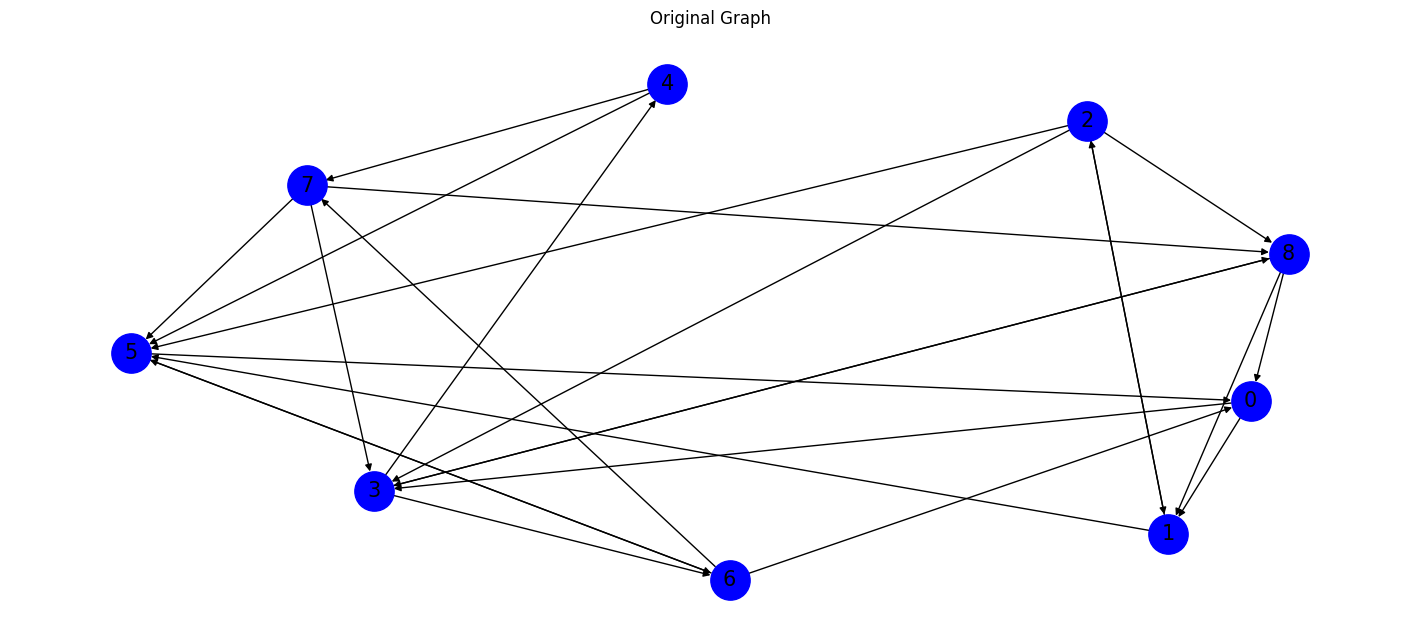


Removed Edges:
(0, 1)
(3, 8)
(6, 0)
(2, 1)
(6, 5)
(1, 5)
(7, 3)
(2, 3)
(4, 5)
(8, 3)
(5, 0)
(3, 6)
(7, 5)
(2, 8)

GRAPH AFTER REMOVING EDGES:
{0: {3}, 1: {2}, 2: {5}, 3: {4}, 4: {7}, 5: {6}, 6: {7}, 7: {8}, 8: {0, 1}}


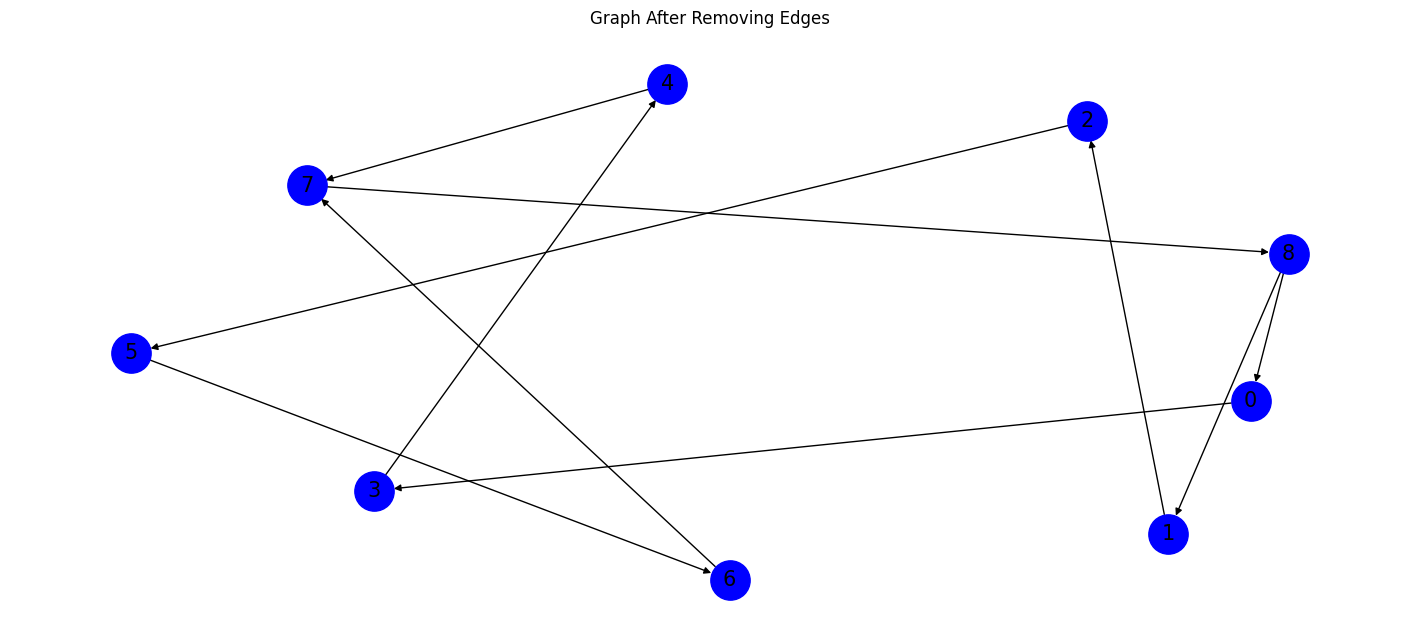


The resulting graph is still strongly connected.


In [13]:
N = randint(6, 10)  # Randomly choose N between 6 and 10
G = create_strongly_connected_graph(N)

while not is_strongly_connected(G):
    G = create_strongly_connected_graph(N)

print(f"\n{"GENERATED GRAPH"}:")
print(G)

pos = nx.spring_layout(G)

draw_graph(G, pos, "Original Graph")

resulting_graph, removed_edges = remove_edges_while_maintaining_connectivity(G)

if removed_edges:
    print("\nRemoved Edges:")
    for edge in removed_edges:
        print(edge)
else:
    print("\nNo edges were removed.")

modified_graph = {node: set(edges) - {v for u, v in removed_edges if u == node} for node, edges in G.items()}
print(f"\n{"GRAPH AFTER REMOVING EDGES"}:")
print(modified_graph)

draw_graph_after_removal(G, removed_edges, pos, "Graph After Removing Edges")

if is_strongly_connected(resulting_graph):
    print("\nThe resulting graph is still strongly connected.")
else:
    print("\nThe resulting graph is NOT strongly connected.")